In [1]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
from PIL import Image
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%matplotlib inline

In [2]:
bs = 64

In [3]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [5]:
path_anno = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_17.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_82.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_132.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_149.jpg')]

In [7]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [8]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

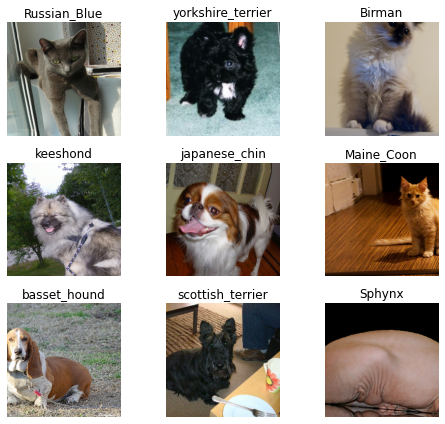

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [12]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.394444,0.333421,0.110961,01:25
1,0.627030,0.272896,0.085250,01:21
2,0.389919,0.241418,0.071719,01:21
3,0.276419,0.228237,0.069689,01:22


In [14]:
learn.save('stage-1')

Part 4: Explain what is a residual network, and the basic motivation for using it.

Resnet was built to solve some of the problems that appeared in conventional NN which resulted in improved accuracy and performance. Resnet uses residual blocks which creates skipping connections. It helps solving the problem of vanishing gradient in deep neural networks by creating short cuts for the gradient to flow through. This helps improveing the performance of neural networks.

Part 5:

When training a classifier neural network, the initial layers are created to identify features such as lines and shapes. By using a pretrained network we are able to make the training process faster and make the results more accurate. 
The final layer of the neural network is added to learn to identify the classes of the object. In the case of the dataset, we will be identifying the type of pets. By removing the final layer of the pretrained resnet34, we are able to randomly initialize it and train it based on our needs.

In [16]:
# Part 6 non pre-trained resnet34
learn2 = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [18]:
learn2.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.530183,3.921726,0.942490,01:23
1,4.147497,3.715115,0.905277,01:24
2,3.766717,3.355212,0.860622,01:23
3,3.514136,3.132809,0.838295,01:24


In [19]:
learn2.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


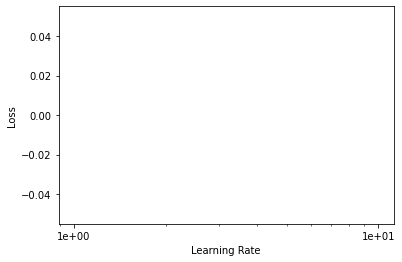

In [20]:
learn.recorder.plot()

In [21]:
learn2.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,3.427722,3.216028,0.834235,01:24
1,3.498088,3.394511,0.833559,01:24
2,3.434499,3.282611,0.876184,01:24
3,3.337905,3.386335,0.880244,01:24
4,3.106228,3.026618,0.794317,01:22
5,2.879987,3.063234,0.833559,01:22
6,2.729986,2.535666,0.700271,01:22
7,2.506953,2.274566,0.651556,01:22
8,2.270200,2.127383,0.587957,01:22
9,2.145901,1.992774,0.575101,01:22


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


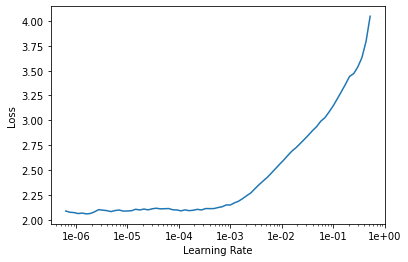

In [22]:
learn2.lr_find()
learn2.recorder.plot()

In [23]:
learn2.save('stage-1')

In [25]:
learn2.unfreeze()

In [26]:
learn2.fit_one_cycle(15, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,2.104065,2.027754,0.579838,01:22
1,2.064176,2.066152,0.572395,01:22
2,2.057165,2.145745,0.570365,01:22
3,2.024379,1.946438,0.558187,01:21
4,2.004078,1.903165,0.556834,01:22
5,1.954321,1.939486,0.552774,01:22
6,1.913232,1.845137,0.537212,01:21
7,1.922292,1.866624,0.548038,01:23
8,1.875801,1.821582,0.535183,01:22
9,1.871726,1.791625,0.533153,01:22


After adjusting the learning rate range and increasing the number of epochs, we can clearly see that the error rate is going down. However, it plateaus around 53%. It would take a lot more tuning and epochs to get it below 20%.

Part 7:

Creating a classification problem for weather.
Dataset were downloaded from a Keggle competition, it was then labeled individually.
The problem uses a pretrained ResNet34 to identify the weather.

In [52]:
from google_drive_downloader import GoogleDriveDownloader as gdd

path = gdd.download_file_from_google_drive(file_id='1Y8VU2OfFZ8fGNhaToH2r8_wTgNvUUR4u',
                                    dest_path='./data/weather.zip',
                                    unzip=True)

Unzipping...

In [ ]:
!tar -xzvf data/weather.tar.gz

In [62]:
path_img = '/content/dataset'

In [63]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/content/dataset/foggy280.jpg'),
 PosixPath('/content/dataset/foggy123.jpg'),
 PosixPath('/content/dataset/rain42.jpg'),
 PosixPath('/content/dataset/foggy220.jpeg'),
 PosixPath('/content/dataset/shine44.jpg')]

In [122]:
np.random.seed(2)
pat = r'/([^/]+[ABC])\d+.(jpg|jpeg|png)$'

In [134]:
import pandas as pd
from string import digits

pic_names = [x.name for x in fnames]
pic_label = []

for pic in pic_names:
  pos = pic.find('.')
  temp = pic[:pos]
  remove_digits = str.maketrans('', '', digits)
  res = temp.translate(remove_digits)
  pic_label.append(res)

print(pic_names)
print(pic_label)

data = {
    'name': pic_names,
    'label':pic_label
}

print(data)

['foggy280.jpg', 'foggy123.jpg', 'rain42.jpg', 'foggy220.jpeg', 'shine44.jpg', 'sunrise21.jpg', 'cloudy187.jpg', 'rain208.jpg', 'foggy216.jpeg', 'cloudy195.jpg', 'cloudy182.jpg', 'rain11.jpg', 'rain171.jpg', 'rain129.jpg', 'cloudy55.jpg', 'shine27.jpg', 'shine210.jpg', 'shine7.jpg', 'rain5.jpg', 'sunrise48.jpg', 'shine214.jpg', 'sunrise3.jpg', 'sunrise36.jpg', 'rain249.jpg', 'shine96.jpg', 'sunrise42.jpg', 'rain250.jpg', 'sunrise114.jpg', 'foggy53.jpg', 'rain243.jpg', 'cloudy180.jpg', 'rain34.jpg', 'shine1.jpg', 'shine198.jpg', 'rain66.jpg', 'cloudy185.jpg', 'shine216.jpg', 'rain270.jpg', 'sunrise198.jpg', 'rain258.jpg', 'cloudy237.jpg', 'rain227.jpeg', 'sunrise77.jpg', 'foggy108.jpg', 'cloudy257.jpg', 'sunrise132.jpg', 'shine29.jpg', 'shine230.jpg', 'sunrise325.jpg', 'shine86.jpg', 'shine129.jpg', 'cloudy192.jpg', 'cloudy106.jpg', 'rain263.jpg', 'rain78.jpg', 'shine211.jpg', 'sunrise147.jpg', 'shine141.jpg', 'shine153.jpg', 'shine72.jpg', 'cloudy84.jpg', 'rain281.jpg', 'foggy103.jpg',

In [135]:
df = pd.DataFrame(data, columns=['name', 'label'])
df.head()

,name,label
0,foggy280.jpg,foggy
1,foggy123.jpg,foggy
2,rain42.jpg,rain
3,foggy220.jpeg,foggy
4,shine44.jpg,shine


In [136]:
data = ImageDataBunch.from_df(path_img, df, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

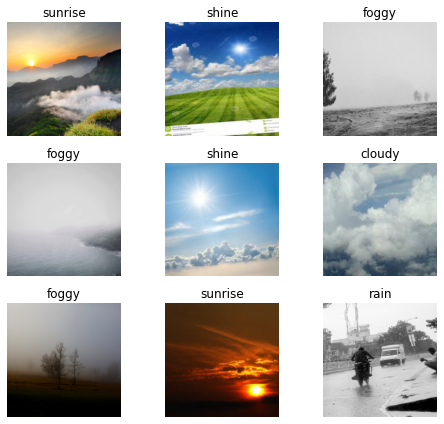

In [137]:
data.show_batch(rows=3, figsize=(7,6))

In [138]:
print(data.classes)
len(data.classes),data.c

['cloudy', 'foggy', 'rain', 'shine', 'sunrise']


(5, 5)

In [139]:
learn = cnn_learner(data, models.resnet34, metrics = [accuracy, error_rate])
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [141]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.549945,0.190570,0.933333,0.066667,00:30


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


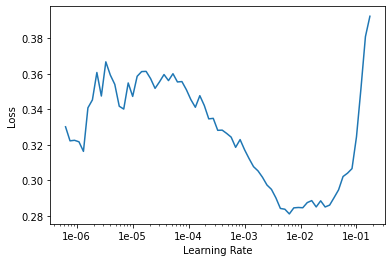

In [142]:
learn.lr_find()
learn.recorder.plot()

In [143]:
learn.unfreeze()

In [145]:
learn.fit_one_cycle(10, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.341100,0.369844,0.926667,0.073333,00:31
1,0.372751,9.297297,0.793333,0.206667,00:31
2,0.413529,7.854728,0.670000,0.330000,00:31
3,0.388563,10.035880,0.730000,0.270000,00:31
4,0.403879,0.353030,0.923333,0.076667,00:30
5,0.345704,0.852308,0.883333,0.116667,00:31
6,0.291317,0.116970,0.960000,0.040000,00:31
7,0.246403,0.157955,0.960000,0.040000,00:31
8,0.199699,0.104928,0.966667,0.033333,00:31
9,0.167056,0.107198,0.966667,0.033333,00:30


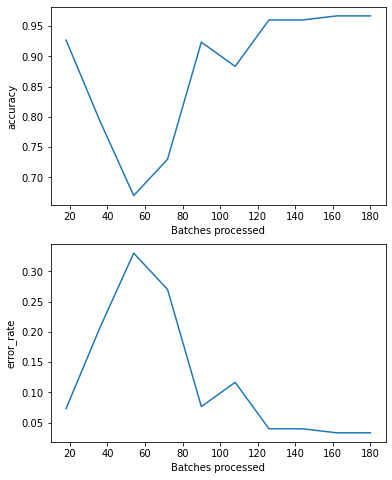

In [146]:
learn.recorder.plot_metrics()

In [147]:
learn2 = cnn_learner(data, models.resnet50, metrics = [error_rate])
learn2.model

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [148]:
learn2.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.717113,0.171824,0.063333,00:32


In [150]:
learn2.unfreeze()

In [151]:
learn2.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.252912,0.111557,0.033333,00:33
1,0.212304,0.126328,0.030000,00:33
2,0.221685,0.502651,0.076667,00:34
3,0.233921,0.331428,0.060000,00:33
4,0.212542,0.073269,0.030000,00:33
5,0.165622,0.052502,0.020000,00:33
6,0.126315,0.044782,0.020000,00:33
7,0.097279,0.053439,0.016667,00:33
8,0.075041,0.026092,0.016667,00:33
9,0.057902,0.026023,0.016667,00:34


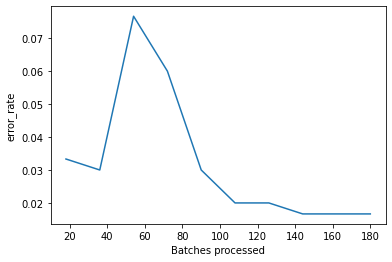

In [152]:
learn2.recorder.plot_metrics()

ResNet is extremely powerful in the field of image recognition. Pretrained ResNet34 achieved 0.03333 in 10 epochs, pretrained ResNet50 achieved 0.01667 in 10 epochs. These are extremly good numbers. This also hows the ease and power of transfer learning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')